## Artificial Intelligence TP2 - Online Shoppers Intention


In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import TomekLinks
from sklearn.svm import SVC
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import make_pipeline
from imblearn.under_sampling import OneSidedSelection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
from sklearn.utils import resample
from imblearn.under_sampling import NearMiss

### Dataset Information
| Feature Name             | Description                                                                                                             |
|-------------------------|-------------------------------------------------------------------------------------------------------------------------|
| Administrative          | Indicates the number of pages visited by the user in the administrative category.                                      |
| Administrative Duration | Represents the time spent by the user on administrative pages.                                                          |
| Informational           | Indicates the number of pages visited by the user in the informational category.                                       |
| Informational Duration  | Represents the time spent by the user on informational pages.                                                          |
| ProductRelated          | Indicates the number of pages visited by the user in the product-related category.                                     |
| ProductRelated Duration | Represents the time spent by the user on product-related pages.                                                        |
| BounceRates             | The percentage of visitors who enter the website through a specific page and exit without engaging in any further activities. |
| ExitRates               | The percentage of pageviews on the website that end on a specific page.                                                |
| PageValues              | Represents the average value of a page considering the value of the target page and/or the completion of an eCommerce transaction. This value is averaged. |
| SpecialDay              | Indicates the proximity of the browsing date to special days or holidays when the likelihood of completing a transaction is higher. |
| Month                   | Represents the month in which the pageview occurred, presented as a string.                                            |
| OperatingSystems        | An integer value representing the user's operating system while viewing the page.                                      |
| Browser                 | An integer value representing the user's browser used for viewing the page.                                            |
| Region                  | An integer value representing the user's geographical region.                                                          |
| TrafficType             | An integer value representing the category of traffic the user belongs to.                                             |
| VisitorType             | A string indicating whether the visitor is a New Visitor, Returning Visitor, or falls into another category.          |
| Weekend                 | A boolean value indicating whether the session occurred on a weekend.                                                 |
| Revenue                 | A boolean value indicating whether the user completed a purchase.                                                     |


### Data Pre-Processing
Before using any new data set, the data should be initially processed in order to verify if it's in correct shape for being used.

In [231]:
df = pd.read_csv('./dataset/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


#### Descriptive Statistics

In [232]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#### Checking for missing values (N/A)
It's normal for large datasets to have missing values, which needs to be handled early on.

In [233]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

As we can observe, our dataset doesn't have any missing values.

#### Data Visualization


In [234]:
# The dataset has 18 columns, being the first 10 numerical and the last 8 categorical. And the last one the target (Revenue)

target = df.columns[-1]

num_attributes = df.columns[:10]

cat_attributes = df.columns[10:]

continuous_attributes = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration", "PageValues", "SpecialDay","BounceRates","ExitRates"]
discrete_attributes = ["Administrative","Informational","ProductRelated"]

#### Plotting Continuous Data
We will be using histograms to visualize continuous data.

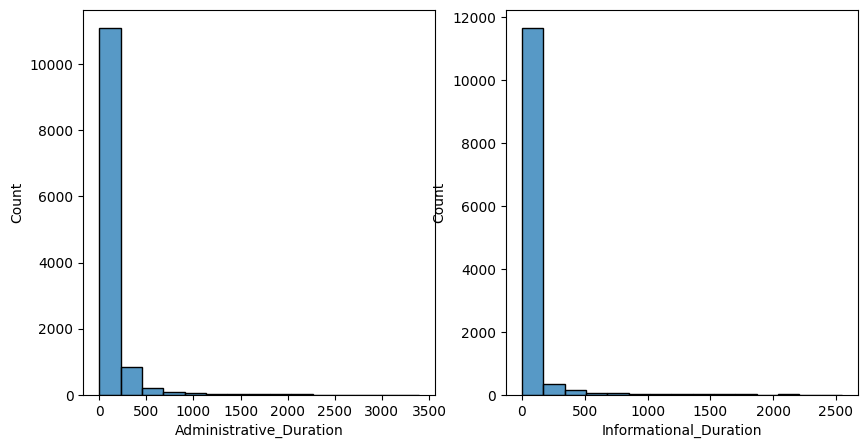

In [235]:
def plot_two_histograms(df,first_attr,sec_attr):

    if sec_attr is None:
        n_bins1 = int(np.ceil(1 + np.log2(len(df[first_attr]))))
        sb.histplot(data=df, x=first_attr, bins=n_bins1)
        return

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

    #Sturges' rule
    n_bins1 = int(np.ceil(1 + np.log2(len(df[first_attr]))))
    n_bins2 = int(np.ceil(1 + np.log2(len(df[sec_attr]))))

    sb.histplot(data=df, x=first_attr, ax=ax1, bins=n_bins1)
    sb.histplot(data=df, x=sec_attr, ax=ax2, bins=n_bins2)
    plt.show()

def plot_three_barplots(data, first_attr, sec_attr, thr_attr):
    fig, ax = plt.subplots(ncols=3, figsize=(12,8))
    ax[0].bar(data[first_attr].value_counts().index, data[first_attr].value_counts().values)
    ax[0].set_title(first_attr)
    ax[1].bar(data[sec_attr].value_counts().index, data[sec_attr].value_counts().values)
    ax[1].set_title(sec_attr)
    ax[2].bar(data[thr_attr].value_counts().index, data[thr_attr].value_counts().values)
    ax[2].set_title(thr_attr)
    plt.show()

plot_two_histograms(df,"Administrative_Duration","Informational_Duration")

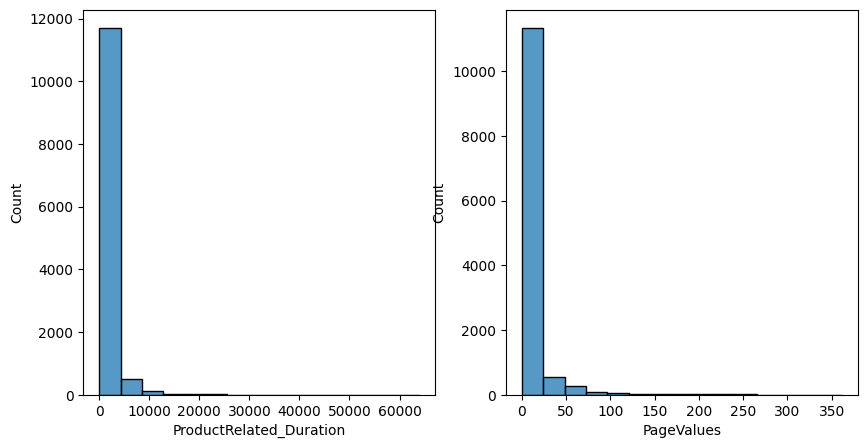

In [236]:
plot_two_histograms(df,"ProductRelated_Duration", "PageValues")

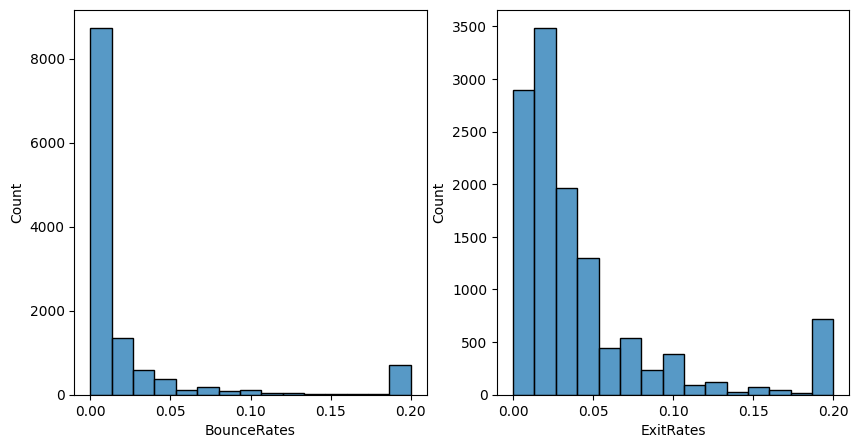

In [237]:
plot_two_histograms(df,"BounceRates","ExitRates")

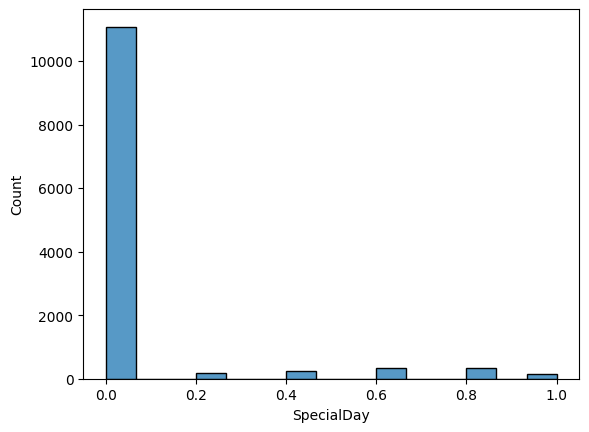

In [238]:
plot_two_histograms(df,"SpecialDay",None)

By looking of the histograms for our continuous data, we can clearly see that our dataset doesn't follow a normal/gaussian distribution, as the data is very sweked.

#### Plotting Discrete Data
We will be using bar plots to observe the distribution of discrete attributes.

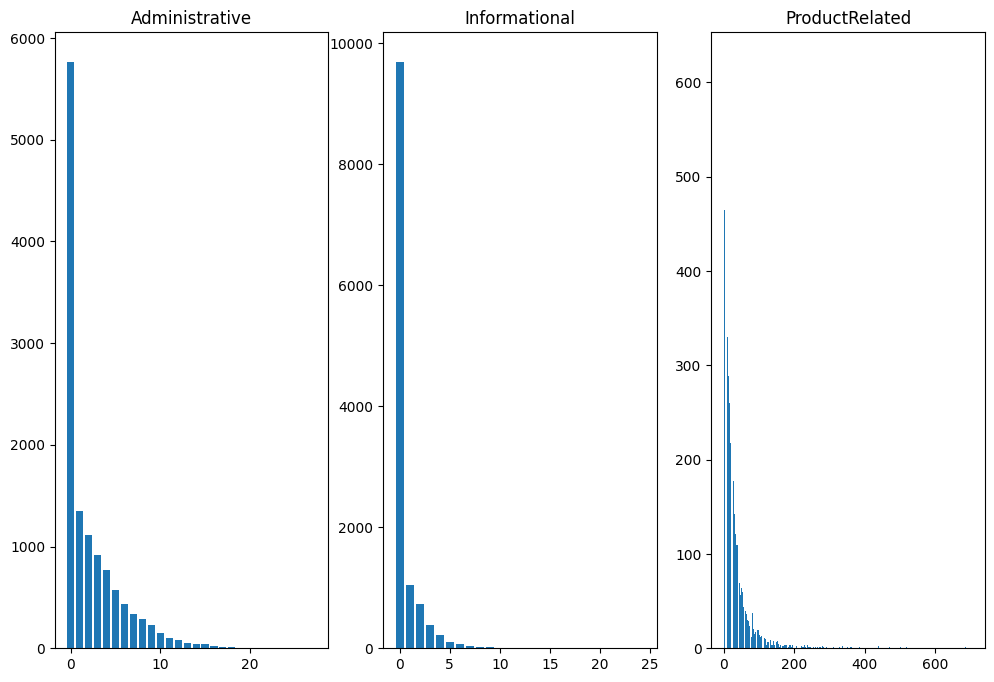

In [239]:
plot_three_barplots(df,"Administrative","Informational","ProductRelated")

#### Plotting Categorical Data
We will be using count plots to observe the number & percentage of occurrences of the categorical attributes.

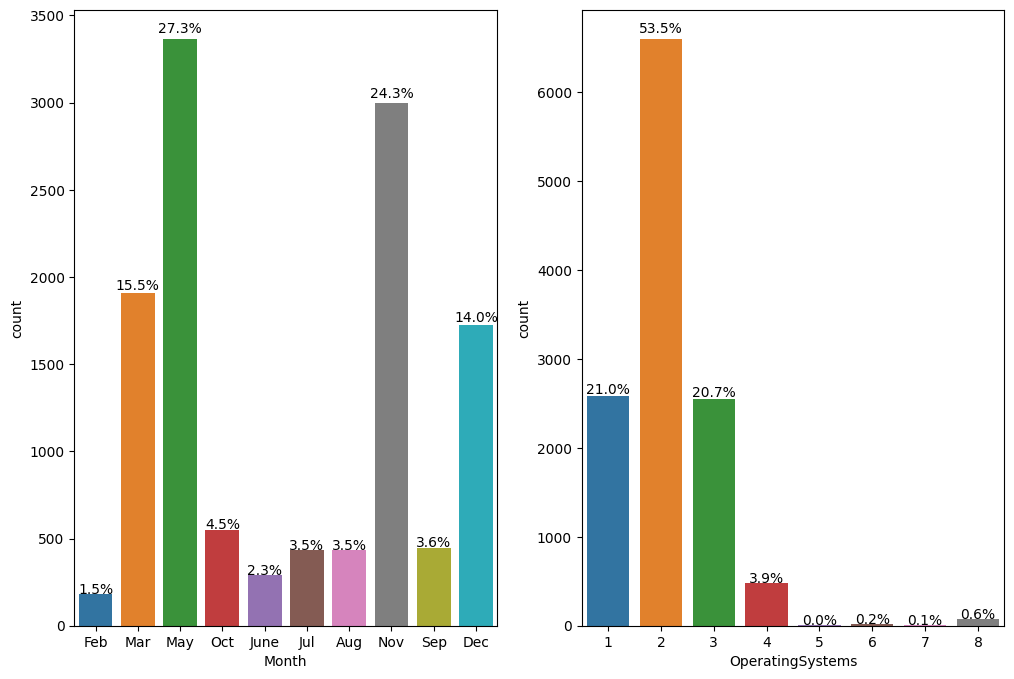

In [240]:
# Function to plot 2 consecutive count plots
def two_countplots(df,first_attr,sec_attr):
    fig, axes = plt.subplots(1, 2, figsize=(12, 8))

    sb.countplot(x=first_attr, data=df, ax=axes[0])
    sb.countplot(x=sec_attr, data=df, ax=axes[1])

    for ax in axes:
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2,
                    height*1.01,
                    f"{height / len(df) * 100:.1f}%",
                    ha="center")

    plt.show()

two_countplots(df,"Month","OperatingSystems")

We can see that both January & April are missing in the dataset, which is weird by itself. Regarding Operating Systems the vast majority of the dataset is distributed between 1,2 & 3.

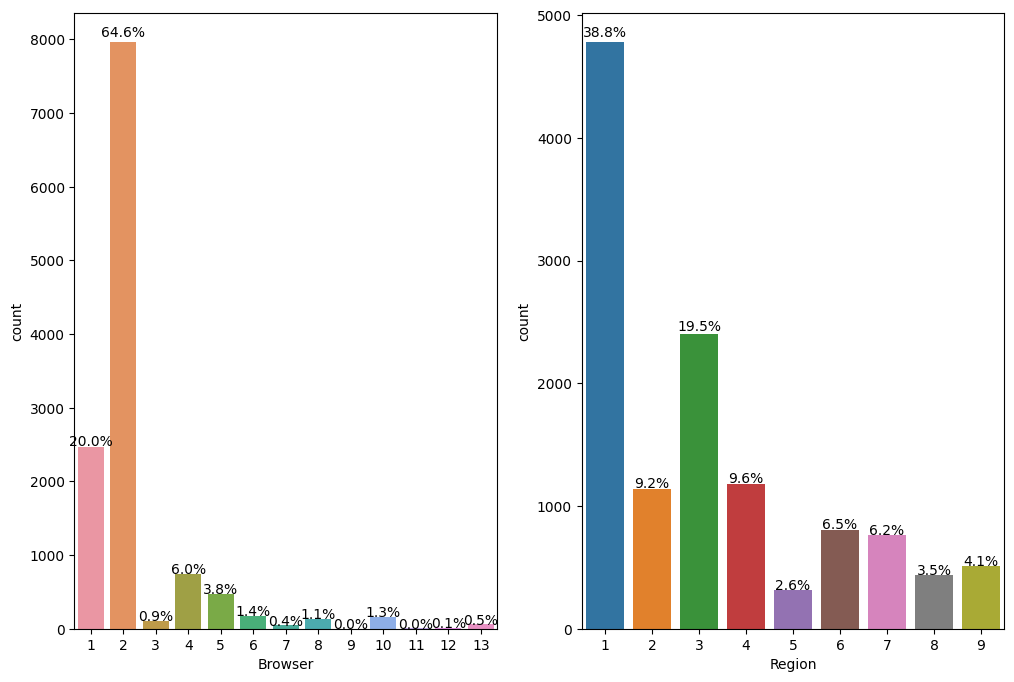

In [241]:
two_countplots(df,"Browser","Region")

We can see that browser 1 & 2 dominate the pool, as well as region 1 and 3.

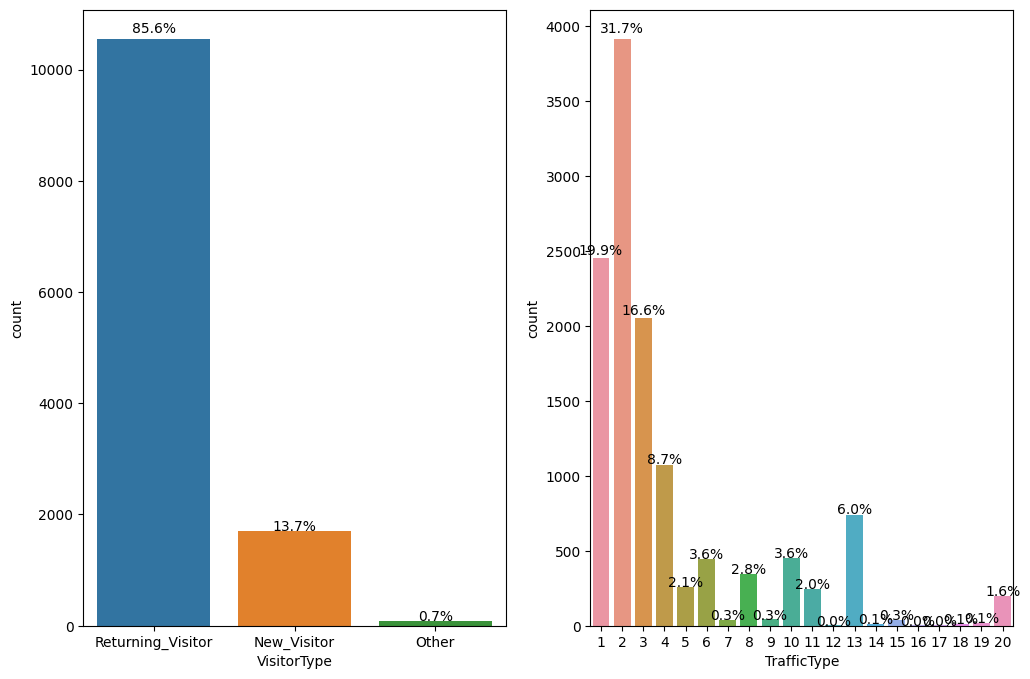

In [242]:
two_countplots(df,"VisitorType","TrafficType")

Most of the users in the dataset are returning visitors, followed by new visitors. It's strange to have a third category like "Other", since returning and new visitors should cover all the types of user. It's hard to interpret the TrafficType attribute since it's given my Google Analytics.

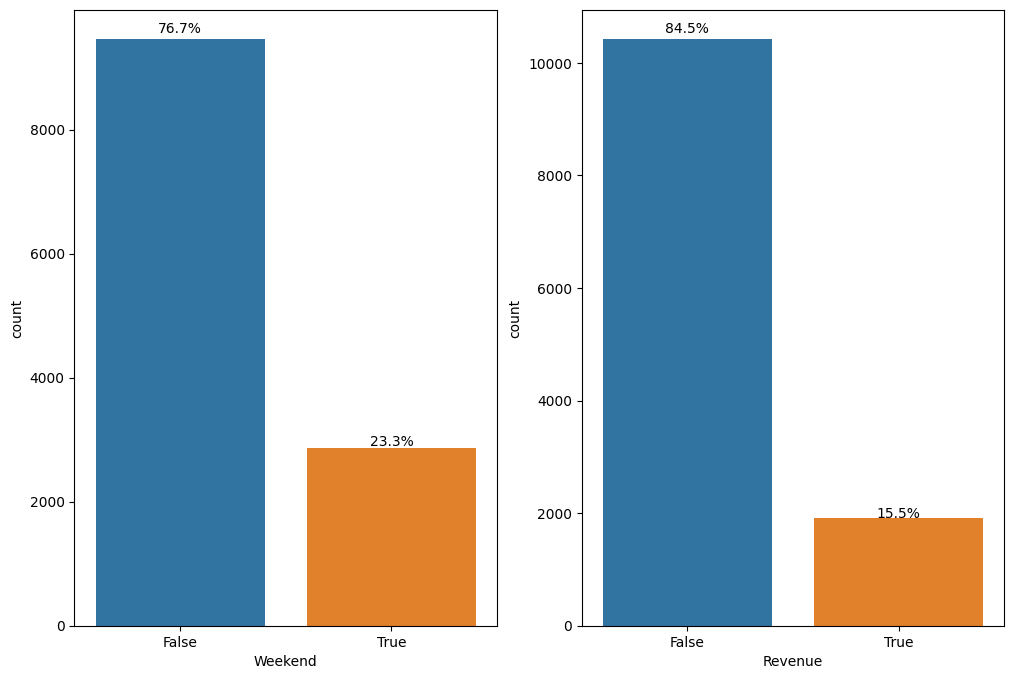

In [243]:
two_countplots(df,"Weekend","Revenue")

We can observe that both Weekend & Revenue are very unbalanced. The target is highly imbalanced, only 15.5% of the users actually made a purchase on the website.

#### Checking for outliers
We must look for outliers even though we tested the dataset for null values. Outliers are data points that differ dramatically from the remainder of the dataset. This same outliers are responsible for skewing the data distribution.
For this specific dataset, we can see that the values vary a lot.

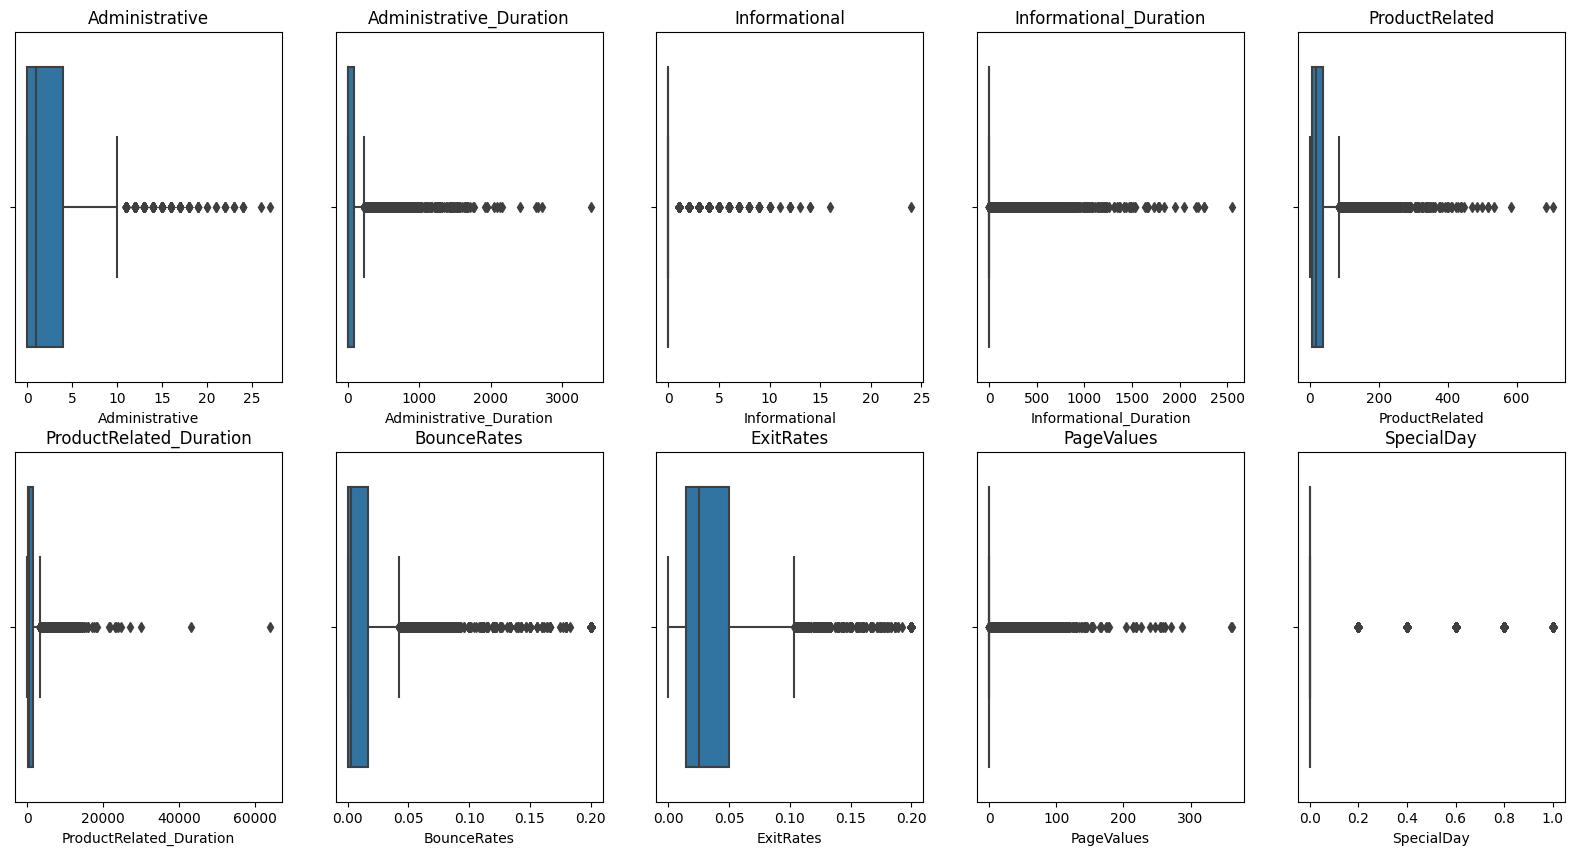

In [244]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

for i, attribute in enumerate(num_attributes):
    row = i // 5
    col = i % 5
    sb.boxplot(x=df[attribute], ax=axs[row][col])
    axs[row][col].set_title(attribute)


We can see that our dataset is full of outliers. However dealing with them is relatively hard, because we don't know for sure if what we see as an outliers is actually an error/mistake or not because they can be the dictating factor that means if a purchase was made or not. So we will end up just removing the values that we know are impossible. e.g negative time duration

In [245]:
def check_neg_values(data, attributes):
    print('\033[1m' + "Negative Values" + '\033[0m')
    for attribute in attributes:
        negative_count = (data[attribute] < 0).sum()
        print(f"Attribute '{attribute}' has {negative_count} negative values.")
    print()

def check_invalid_percentages(data, attributes):
    print('\033[1m' + "Invalid Percentages" + '\033[0m')
    for attribute in attributes:
        one_count = (data[attribute] > 1).sum()
        print(f"Attribute '{attribute}' has {one_count} greater than 1.0 values.")

check_neg_values(df, continuous_attributes)

check_invalid_percentages(df,["BounceRates","ExitRates","SpecialDay"])

Negative Values
Attribute 'Administrative_Duration' has 0 negative values.
Attribute 'Informational_Duration' has 0 negative values.
Attribute 'ProductRelated_Duration' has 0 negative values.
Attribute 'PageValues' has 0 negative values.
Attribute 'SpecialDay' has 0 negative values.
Attribute 'BounceRates' has 0 negative values.
Attribute 'ExitRates' has 0 negative values.

Invalid Percentages
Attribute 'BounceRates' has 0 greater than 1.0 values.
Attribute 'ExitRates' has 0 greater than 1.0 values.
Attribute 'SpecialDay' has 0 greater than 1.0 values.


Thankfully there are no invalid values. So from now on we will just ignore the remaining outliers.

#### Encoding Categorical Data
Since most of the ML algorithms work better with numerical values, we will encode our categorical data to that format.

In [246]:
# Number of unique values for the specified attributes
non_num = ["Month", "VisitorType", "Weekend","Revenue"]

# Find number of different categories
for attr in non_num:
    print('\033[1m' + attr.upper() + '\033[0m')
    print("Distinct Values:", df[attr].nunique())
    print(df[attr].value_counts(),'\n')

MONTH
Distinct Values: 10
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64 

VISITORTYPE
Distinct Values: 3
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64 

WEEKEND
Distinct Values: 2
False    9462
True     2868
Name: Weekend, dtype: int64 

REVENUE
Distinct Values: 2
False    10422
True      1908
Name: Revenue, dtype: int64 



The month attribute is missing both January & April, and there are three different types of visitors {Returning_Visitor,New_Visitor & Other}

In [247]:
# Dealing with boolean attributes first
df["Weekend"].replace({True: 1, False: 0},inplace=True)
df["Revenue"].replace({True: 1, False: 0},inplace=True)

# Dealing with Month Column - Circular Encoding
months = {'Jan': 1, 'Feb':2, 'Mar':3, 'Apr': 4, 'May':5, 'June':6,'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10,'Nov': 11, 'Dec': 12}
def circular_encode_month(month):
    month_num = months[month]
    angle = 2 * np.pi * (month_num - 1) / 12
    return np.cos(angle), np.sin(angle)

df[['Month_Cos', 'Month_Sin']] = df['Month'].apply(lambda x: pd.Series(circular_encode_month(x)))
df.drop('Month', axis=1, inplace=True)

# Dealing with Visitor Type Column - One Hot Encoding
dic = {'Returning_Visitor': 1, 'New_Visitor': 2, 'Other': 3}
encoded_data = pd.get_dummies(df['VisitorType'], prefix='VT')
df.drop('VisitorType', axis=1, inplace=True)
df = pd.concat([df, encoded_data], axis=1)

# Check if data changed
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser,Region,TrafficType,Weekend,Revenue,Month_Cos,Month_Sin,VT_New_Visitor,VT_Other,VT_Returning_Visitor
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,...,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,1.233000e+04,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,...,2.357097,3.147364,4.069586,0.232603,0.154745,0.092869,1.520652e-02,0.137388,0.006894,0.855718
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,...,1.717277,2.401591,4.025169,0.422509,0.361676,0.602729,7.924280e-01,0.344271,0.082745,0.351390
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,...,2.000000,1.000000,2.000000,0.000000,0.000000,-0.500000,-8.660254e-01,0.000000,0.000000,1.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,...,2.000000,3.000000,2.000000,0.000000,0.000000,0.500000,1.224647e-16,0.000000,0.000000,1.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,...,2.000000,4.000000,4.000000,0.000000,0.000000,0.500000,8.660254e-01,0.000000,0.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,...,13.000000,9.000000,20.000000,1.000000,1.000000,0.866025,8.660254e-01,1.000000,1.000000,1.000000


We can see the one-hot-encoding worked indeed, as well as the circular encoding for the months.

#### Correlation Matrix
We will be using a correlation matrix to observe the relationship between the continuous attributes

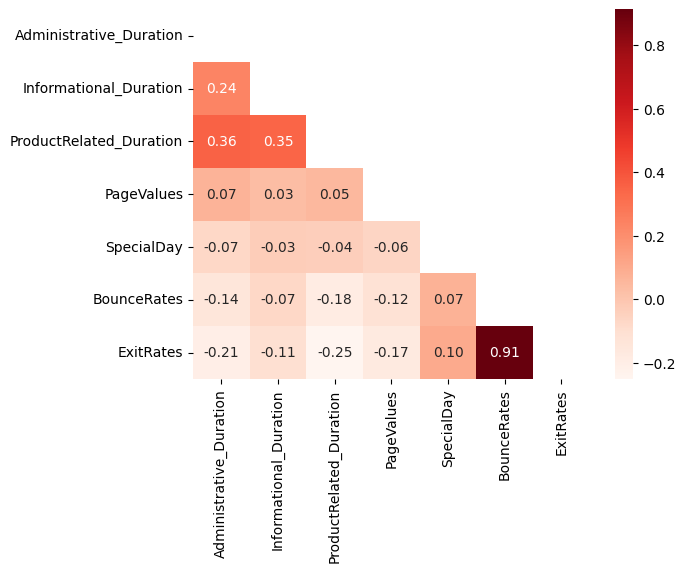

In [248]:
# Creating Correlation Matrix
df_continuous = df[continuous_attributes]
corr = df_continuous.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(corr, mask=mask, cmap='Reds', annot=True, fmt='.2f')
plt.show()

We can see that the correlation between the continuous attributes is mostly low. 
However there are some notorious correlations:
- **BounceRates & ExitRates** - 0.91
- **Administrative Duration & Informational Duration** - 0.24
- **Administrative Duration & ProductRelated Duration** - 0.36
- **Informational Duration & ProductRelated Duration** - 0.35

#### Chi Square Test / Point-Biserial Correlation
In order to test the dependence of the discrete and categorical values with the target we will be using a Chi Square Test.
While to test the correlation between the continuous features and the target we will use Point-Biserial Correlation. (We wanted to try out the **T Test**, but since our data doesn't follow a normal distribution it's not possible!)

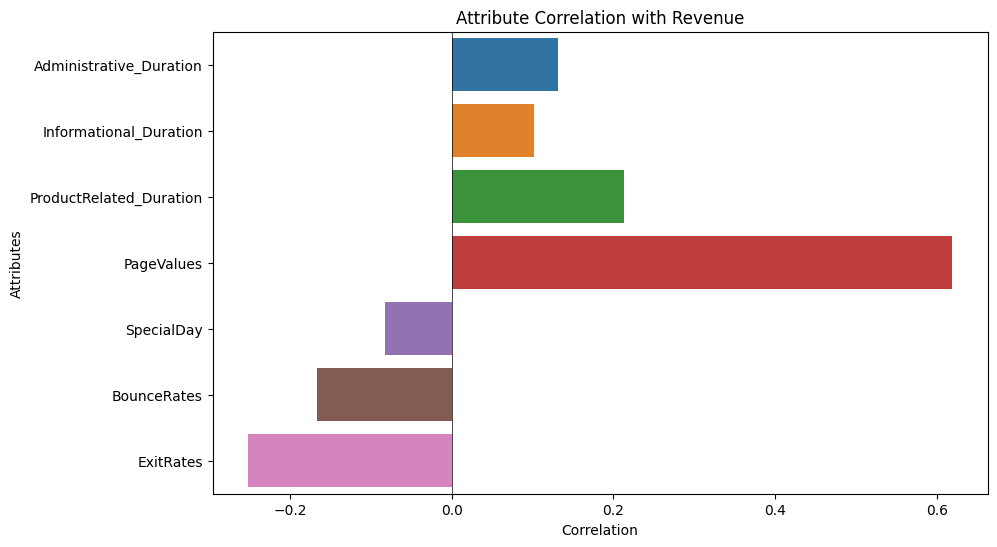

In [249]:
disc_cat = ['Administrative', 'Informational', 'ProductRelated',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'VT_New_Visitor', 'VT_Other',
       'VT_Returning_Visitor']

# p value < 0.05 means the target depends on the attribute
def chi_square_test(df,attributes,target):
    results = []
    for attribute in attributes: 
        contingency_table = pd.crosstab(df[attribute], df[target])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        results.append((attribute, p))


    results.sort(key=lambda x: x[1])

    attributes, p_values = zip(*results)
    plt.barh(range(len(attributes)), p_values)
    plt.yticks(range(len(attributes)), attributes)
    plt.xlabel('p-value')
    plt.title('Chi-square Test Results')

    for i, p in enumerate(p_values):
        plt.text(p, i, f' p={p:.4f}', va='center')

    plt.show()


def calculate_point_biserial_corr(data, attribute, target):
    attribute_values = data[attribute].astype('category').cat.codes
    correlation, _ = stats.pointbiserialr(attribute_values, target)
    return correlation

def plot_attribute_correlations(data, attributes, target):
    correlations = [calculate_point_biserial_corr(data, attr, target) for attr in attributes]
    plt.figure(figsize=(10, 6))
    sb.barplot(x=correlations, y=attributes)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlabel('Correlation')
    plt.ylabel('Attributes')
    plt.title('Attribute Correlation with Revenue')
    plt.show()

target = df["Revenue"]
plot_attribute_correlations(df, continuous_attributes, target)


We can see that the features that have the most correlation with the target are:
- **Page Values:** ~ 0.6
- **Exit Rate:** ~ -0.25
- **Product Related Duration:** ~ 0.2
- **Bounce Rates:** ~ -0.18

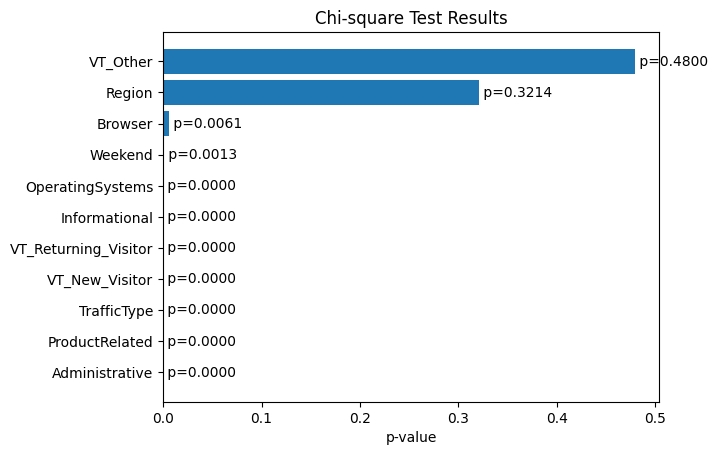

In [250]:
chi_square_test(df,disc_cat,"Revenue")

**Chi Square Test: (Using 0.05 significance level)**

    H0: The attribute and the target have no relationship

    H1: The target depends on the attribute
    
If the p-value is lower than **0.05**, H0 is rejected meaning there is a relationship between both attributes

Therefore we will remove the features with p-value > 0.05 from the dataset as they have no relationship with the target whatsoever.

In [251]:
df.drop(["Region","VT_Other"],axis=1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,TrafficType,Weekend,Revenue,Month_Cos,Month_Sin,VT_New_Visitor,VT_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,0,0,0.866025,0.500000,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,0,0,0.866025,0.500000,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,3,0,0,0.866025,0.500000,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,4,0,0,0.866025,0.500000,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,4,1,0,0.866025,0.500000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1,0,0.866025,-0.500000,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,8,1,0,0.500000,-0.866025,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,13,1,0,0.500000,-0.866025,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,11,0,0,0.500000,-0.866025,0,1


### Algorithms and Model Training
From the Exploratory Data Analysis we can easily conclude that our dataset is highly imbalanced and the distribution of our data is also very skewed. Some machine learning algorithms often struggle to handle such datasets effectively, as they tend to be biased towards the majority class, resulting in poor performance when it comes to accurately predicting instances from the minority class.

We will use undersampling of the majority class to solve the issue of class imbalance and skewed data distribution. Undersampling is the process of lowering the number of examples in the majority class to the number of instances in the minority class. This method contributes to a more balanced training set, allowing machine learning models to learn from representative samples of both classes.

We also tried oversampling the minority class to compare the results with the dataset in which we undersampled.

After balancing the dataset, we'll use StandardScaler to scale the features. Scaling is an important preprocessing step that ensures all characteristics have a comparable scale and range. The characteristics are transformed by StandardScaler by removing the mean and dividing by the standard deviation, resulting in a distribution with a mean of 0 and a standard deviation of 1. This scaling strategy is very effective for algorithms based on distance, such as k-nearest neighbors and support vector machines.


In order to find the best parameters for each algorithm we used GridSearch. We also tried out a custom score function, which is a heuristic with 0.6 Precision & 0.4 Recall.
We choose to value more the precision, because from the business point of view we took in consideration that predicting less False Positives and allowing more False Negatives might be better than the opposite. Some examples: In terms of profits, a false positive would mean investing resources in targeting users who are unlikely to make a purchase and also lets say we want to predict the profit of the company, it's better to make sure there are as few FP as possible, so that we don't get misled by the values.

Since evaluating the performance of an model cannot be done only by looking at the accuracy, (e.g if the number of 0's is high and algorithm predicts only 0's it will mean a good accuracy but not necessarily mean a good algorithm), we will be showing its report (precision,recall & f1-measure) as well as the ROC Curve, with the respective AUC value.

Algorithms tested:
- **Naive Bayes**
- **Logistic Regression**
- **K-Nearest Neighbors** 
- **Support Vector Machine**
- **Random Forest**
- **Stratified Cross-Validation**

In [252]:
# Confusion Matrix Cells Meaning
"""
                      Predicted
             |  Negative  |  Positive  |
---------------------------------------
True Negative|    TN      |    FP      |
---------------------------------------
True Positive|    FN      |    TP      |
--------------------------------------- 
"""

# Common code for all algorithms
def plot_cfmatrix_report(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 5))
    ax1 = plt.subplot(121)
    sb.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=True)

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    classification_rep = classification_report(y_true, y_pred)
    ax2 = plt.subplot(122)
    ax2.text(0.05, 0.5, classification_rep, fontsize=12, ha='left')
    ax2.axis('off')

    total_samples = np.sum(cm)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            value = cm[i, j]
            percentage = value / total_samples * 100
            ax1.text(j + 0.5, i + 0.35, f'{percentage:.2f}%', ha='center', va='center', color='black')

    plt.tight_layout()
    plt.show()

def plot_cfmatrix_report_double(y_true, y_pred1, y_pred2):
    cm1 = confusion_matrix(y_true, y_pred1)
    cm2 = confusion_matrix(y_true, y_pred2)

    plt.figure(figsize=(12, 8))

    # Plotting Confusion Matrix 1
    ax1 = plt.subplot(221)
    sb.heatmap(cm1, annot=True, fmt='d', cmap="Blues", cbar=True)
    plt.title('Undersample Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    classification_rep1 = classification_report(y_true, y_pred1)
    ax2 = plt.subplot(222)
    ax2.text(0.05, 0.5, classification_rep1, fontsize=12, ha='left', va='center')
    ax2.axis('off')

    total_samples1 = np.sum(cm1)
    for i in range(cm1.shape[0]):
        for j in range(cm1.shape[1]):
            value = cm1[i, j]
            percentage = value / total_samples1 * 100
            ax1.text(j + 0.5, i + 0.35, f'{percentage:.2f}%', ha='center', va='center', color='black')

    # Plotting Confusion Matrix 2
    ax3 = plt.subplot(223)
    sb.heatmap(cm2, annot=True, fmt='d', cmap="Blues", cbar=True)
    plt.title('Oversample Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    classification_rep2 = classification_report(y_true, y_pred2)
    ax4 = plt.subplot(224)
    ax4.text(0.05, 0.5, classification_rep2, fontsize=12, ha='left', va='center')
    ax4.axis('off')

    total_samples2 = np.sum(cm2)
    for i in range(cm2.shape[0]):
        for j in range(cm2.shape[1]):
            value = cm2[i, j]
            percentage = value / total_samples2 * 100
            ax3.text(j + 0.5, i + 0.35, f'{percentage:.2f}%', ha='center', va='center', color='black')

    plt.tight_layout()
    plt.show()
    

def plot_auc_curve(model,x_test,y_test):
    y_pred_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('(ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


def plot_auc_curves(model1, model2, x_test, y_test):
    y_pred_prob = model1.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f) - Undersample' % auc)

    y_pred_prob2 = model2.predict_proba(x_test)[:, 1]
    fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)
    auc2 = roc_auc_score(y_test, y_pred_prob2)
    plt.plot(fpr2, tpr2, label='ROC curve (AUC = %0.2f) - Oversample' % auc2, color='red')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('(ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

def plot_auc_folds(fprs, tprs, aucs):
    plt.figure()
    for i in range(len(fprs)):
        plt.plot(fprs[i], tprs[i], label='Fold %d (AUC = %0.2f)' % (i+1, aucs[i]))
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('(ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

def custom_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred, pos_label=1)
    recall = recall_score(y_true,y_pred, pos_label=1)

    return 0.6 * precision + 0.4 * recall 

scoring = {'Custom_score': make_scorer(custom_score)}


def grid_search_eval(x_train, y_train, x_test, y_test, algorithm, param_grid):
    
    grid_search = GridSearchCV(algorithm, param_grid, scoring=scoring, refit='Custom_score', cv=5)
    grid_search.fit(x_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)

    return grid_search.best_params_

We will be using **80%** of the dataset for training the algorithms, while the remaining **20%** will be used for testing.
Here is also where we perform both undersample (using RandomUnderSampler) and oversample (using Smote).

In [253]:
scaler = StandardScaler()
tl = TomekLinks()
smote = SMOTE()
randomUnder = RandomUnderSampler()
x = df.drop('Revenue', axis=1)
y = df['Revenue']

x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, stratify=y)
#x_train_undersampled, y_train_undersampled = tl.fit_resample(x_train, y_train)
x_train_undersampled, y_train_undersampled = randomUnder.fit_resample(x_train, y_train)
x_train_oversampled, y_train_oversampled = smote.fit_resample(x_train, y_train)


# UnderSampled
print('\033[1m' + "UnderSampled Dataset" + '\033[0m')
print(y_train_undersampled.value_counts())
print("X_Train Shape:", x_train_undersampled.shape)
print("Y_Train Shape:", y_train_undersampled.shape)
print("X_Test Shape:", x_test.shape)
print("Y_Test Shape:", y_test.shape, '\n')

# OverSampled
print('\033[1m' + "OverSampled Dataset" + '\033[0m')
print(y_train_oversampled.value_counts())
print("X_Train Shape:", x_train_oversampled.shape)
print("Y_Train Shape:", y_train_oversampled.shape)
print("X_Test Shape:", x_test.shape)
print("Y_Test Shape:", y_test.shape)

UnderSampled Dataset
0    1526
1    1526
Name: Revenue, dtype: int64
X_Train Shape: (3052, 20)
Y_Train Shape: (3052,)
X_Test Shape: (2466, 20)
Y_Test Shape: (2466,) 

OverSampled Dataset
0    8338
1    8338
Name: Revenue, dtype: int64
X_Train Shape: (16676, 20)
Y_Train Shape: (16676,)
X_Test Shape: (2466, 20)
Y_Test Shape: (2466,)


#### Naive Bayes
Naive Bayes is a classification technique based on the Bayes theorem that assumes characteristics are conditionally independent given the class. It is ideally adapted to dealing with high-dimensional data and works effectively when the independence assumption is relatively well held. However, since our data is very skewed and initially imbalanced it may affect the ability of this algorithm to accurately predict the minority class.

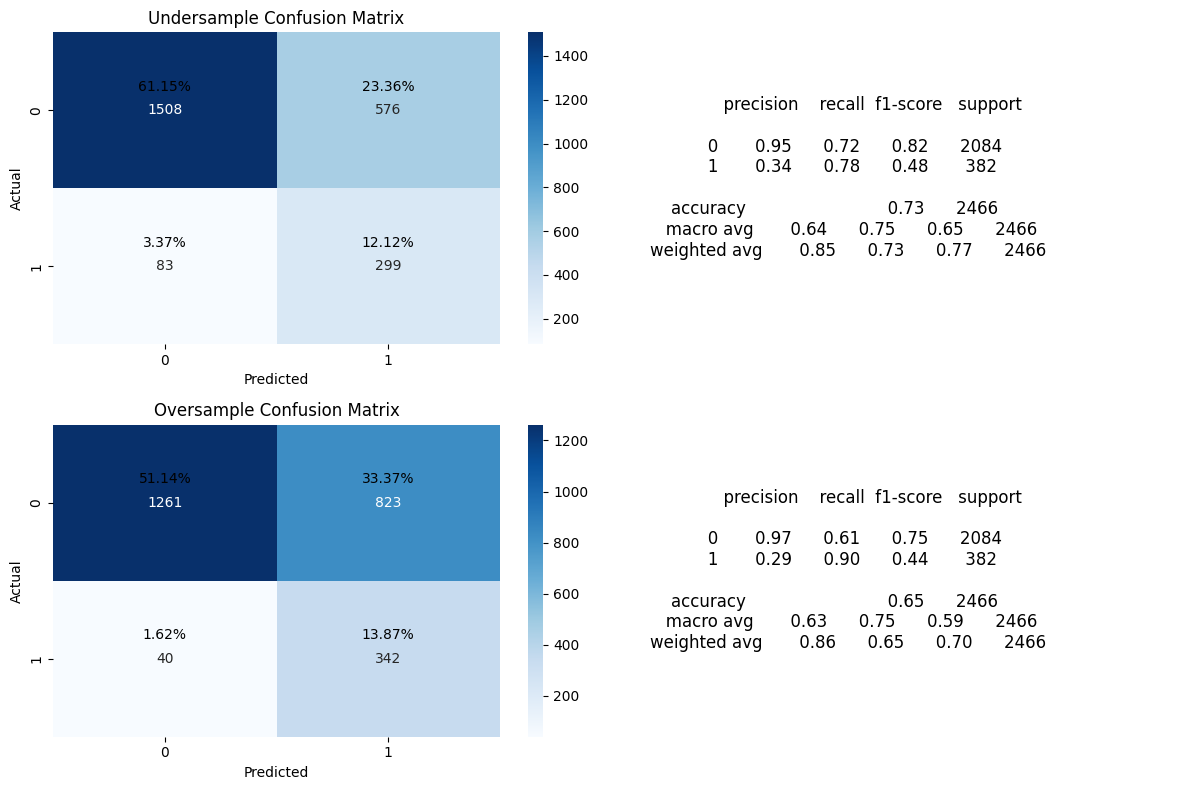

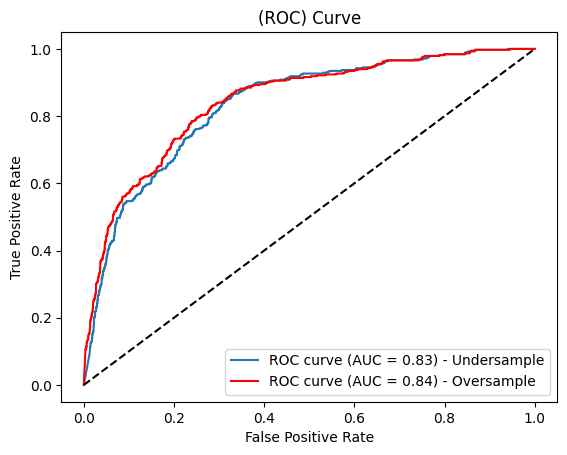

In [254]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]  # Smoothing parameter (alpha)
}

naive_bayes = GaussianNB()

# Undersampling dataset - Best Params = {'var_smoothing': 1e-09}
nb_under_params = grid_search_eval(x_train_undersampled,y_train_undersampled,x_test,y_test,naive_bayes,param_grid)
print("Best Params:", nb_under_params)

# Oversampling dataset - Best Params = {'var_smoothing': 1e-09}
nb_over_params = grid_search_eval(x_train_oversampled,y_train_oversampled,x_test,y_test,naive_bayes,param_grid)
print("Best Params:", nb_over_params)

# Running the models for both undersampling and oversampling
nb_under = GaussianNB(var_smoothing = 1e-09)
nb_under.fit(x_train_undersampled, y_train_undersampled)
y_pred1 = nb_under.predict(x_test)

nb_over = GaussianNB(var_smoothing = 1e-09)
nb_over.fit(x_train_oversampled, y_train_oversampled)
y_pred2 = nb_over.predict(x_test)


plot_cfmatrix_report_double(y_test, y_pred1, y_pred2)
plot_auc_curves(nb_under,nb_over,x_test,y_test)

We can see that the results are not so good for this model. This might happen because Naive Bayes presupposes feature independence, which can lead to inaccurate predictions and lower precision if this assumption is broken. When feature distributions of various classes overlap significantly, this algorithm may struggle to effectively differentiate between them, resulting in a decrease in accuracy.
Finally, because Naive Bayes gives equal weight to all data, it is susceptible to irrelevant features or noise. Because irrelevant characteristics generate needless variances in the categorization process, this sensitivity can have a negative impact on the results.

#### K-Nearest Neighbors 
K-nearest neighbors (KNN) is a classification technique that assigns labels based on their proximity to one another. However, the skewed distribution of our dataset, the starting class imbalance, and the existence of outliers may impair the algorithm's capacity to reliably identify the minority class. These variables can influence KNN's decision limits and bias it towards the majority class.

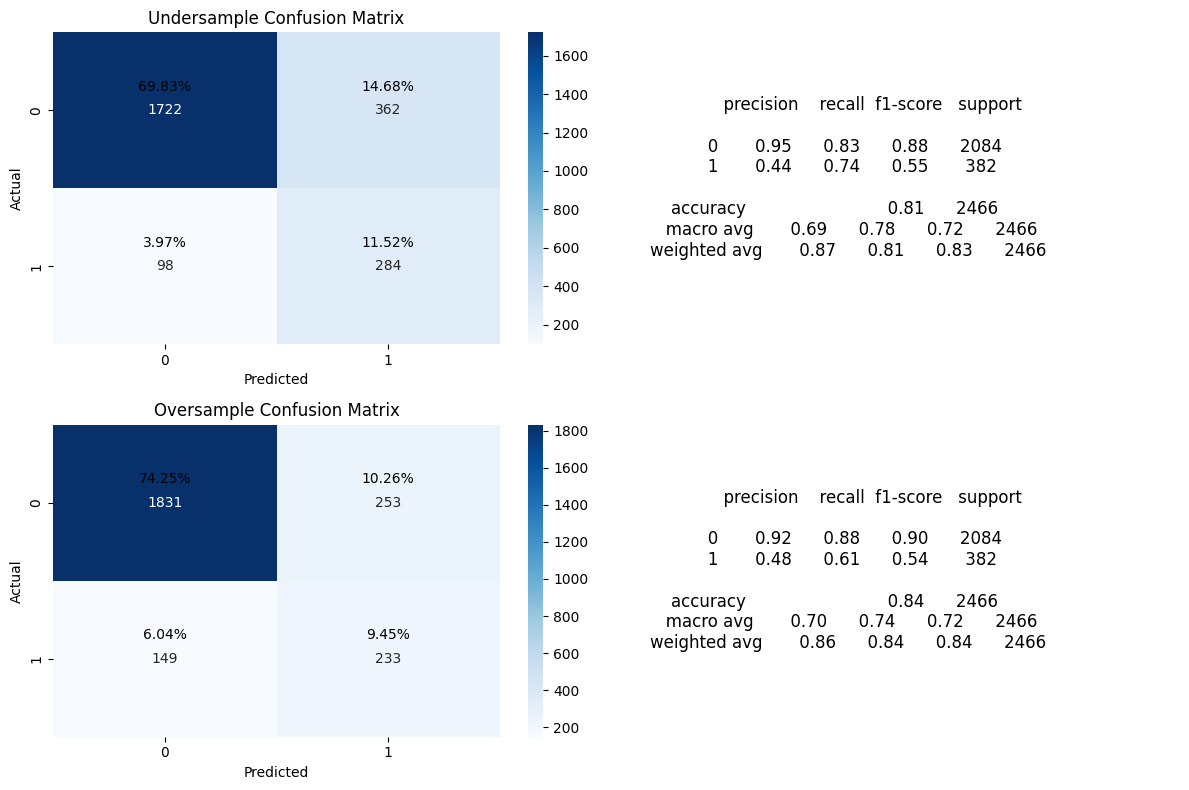

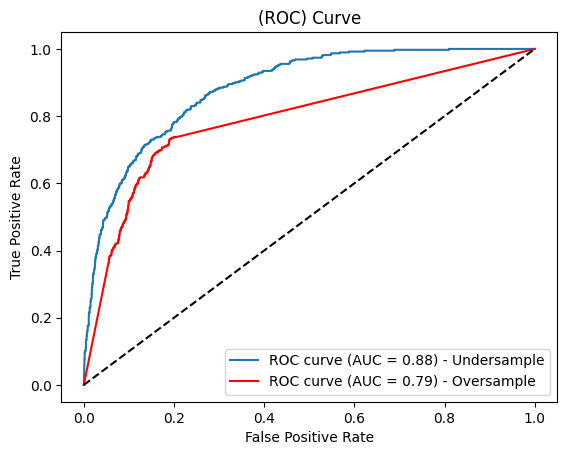

In [255]:
param_grid = {
    'n_neighbors': [3, 5, 7, 12, 15, 17],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm for computing neighbors
    'leaf_size': [30, 40, 50],  # Leaf size for tree-based algorithms
    'p': [1, 2],  # Power parameter for Minkowski distance
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

nearest_nei = KNeighborsClassifier()

# Undersampling dataset - Best Params = {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'n_neighbors': 17, 'p': 1, 'weights': 'distance'}
knn_under_params = grid_search_eval(x_train_undersampled,y_train_undersampled,x_test,y_test,nearest_nei,param_grid)
print("Best Params:", knn_under_params)

# Oversampling dataset - Best Params = {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
knn_over_params = grid_search_eval(x_train_oversampled,y_train_oversampled,x_test,y_test,nearest_nei,param_grid)
print("Best Params:", knn_over_params)

# Running the models for both undersampling and oversampling
knn_under = KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, metric = 'manhattan', n_neighbors = 17, p = 1, weights = 'distance')
knn_under.fit(x_train_undersampled, y_train_undersampled)
y_pred1 = knn_under.predict(x_test)

knn_over = KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, metric = 'manhattan', n_neighbors = 3, p = 1, weights = 'distance')
knn_over.fit(x_train_oversampled, y_train_oversampled)
y_pred2 = knn_over.predict(x_test)

plot_cfmatrix_report_double(y_test, y_pred1, y_pred2)
plot_auc_curves(knn_under,knn_over,x_test,y_test)


We can see that there's a big difference in the AUC between the oversample and undersample, from 0.87 to 0.78, approximately ~ -0.10. This might happen because: when reducing the number of majority class instances, undersampling can help mitigate the overlapping of feature distributions between the classes. This can enhance the classifier's ability to separate the classes and make more accurate predictions.

#### Logistic Regression
Logistic regression is a machine learning algorithm used for binary classification. It predicts the probability of an event using a logistic function. It estimates parameters through optimization, making it computationally efficient.

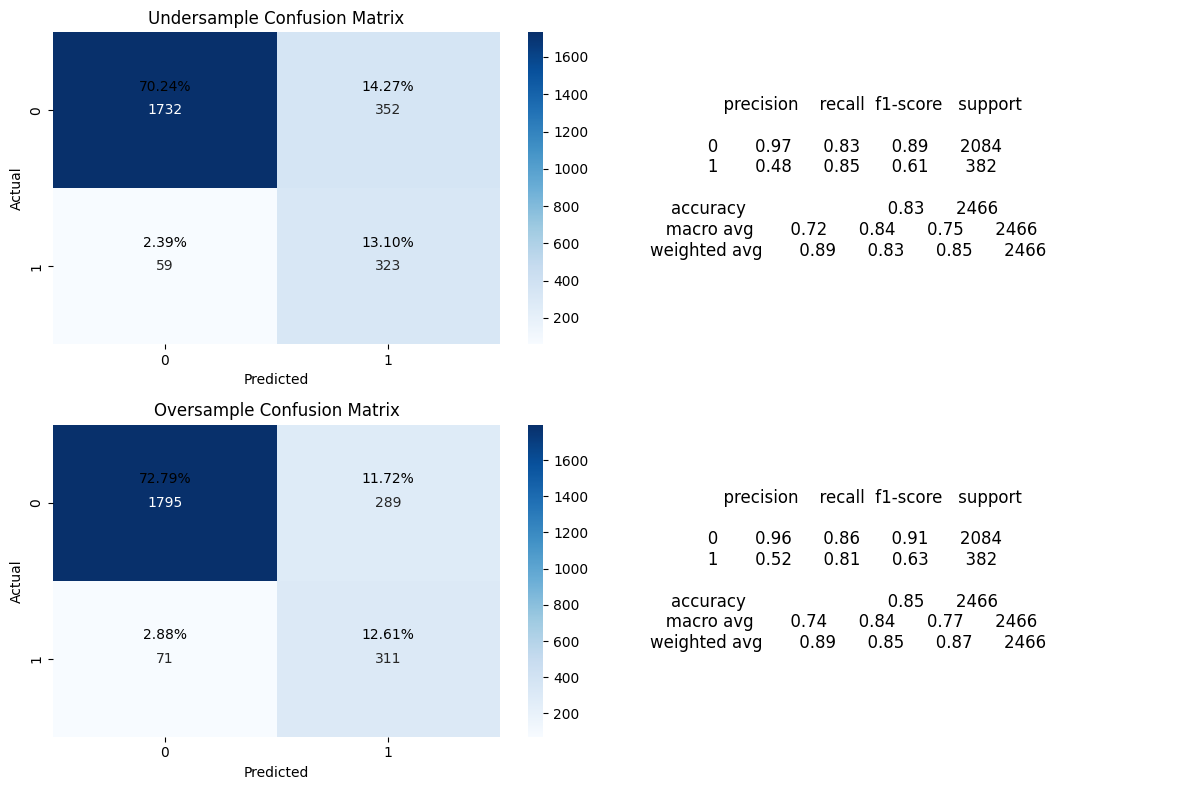

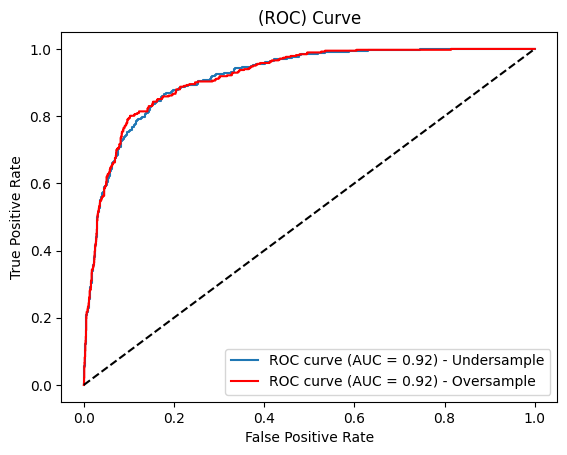

In [256]:
param_grid = {
    'penalty': ['l2'],  # Regularization penalty ('l1' or 'l2')
    'C': [0.1, 1.0, 10.0],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Solver algorithm
    'fit_intercept': [True, False],  # Whether to include an intercept term
    'max_iter': [100, 200, 300], # Max Iterations
    'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 2, 1: 3}, {0: 3, 1: 4}, {0: 4, 1: 5}]  # Different Weights
}

logistic_regression = LogisticRegression()

# Undersampling dataset - Best Params = {'C': 10.0, 'class_weight': None, 'fit_intercept': False, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
lr_under_params = grid_search_eval(x_train_undersampled,y_train_undersampled,x_test,y_test,logistic_regression,param_grid)
print("Best Params:", lr_under_params)


# Oversampling dataset - Best Params = {'C': 10.0, 'class_weight': None, 'fit_intercept': False, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
lr_over_params = grid_search_eval(x_train_oversampled,y_train_oversampled,x_test,y_test,logistic_regression,param_grid)
print("Best Params:", lr_over_params)


# Running the models for both undersampling and oversampling
lr_under = LogisticRegression(random_state=42, C = 10.0, class_weight = None, penalty = 'l2', fit_intercept = False, max_iter=100, solver='liblinear')
lr_under.fit(x_train_undersampled, y_train_undersampled)
y_pred1 = lr_under.predict(x_test)

lr_over = LogisticRegression(random_state=42, C = 10.0, class_weight = None, penalty = 'l2', fit_intercept = False, max_iter=100, solver='saga')
lr_over.fit(x_train_oversampled, y_train_oversampled)
y_pred2 = lr_over.predict(x_test)

plot_cfmatrix_report_double(y_test, y_pred1, y_pred2)
plot_auc_curves(lr_under,lr_over,x_test,y_test)

Both datasets produce a good AUC and accuracy, however the precision is low in both ~ 0.5.

#### Support Vector Machine
The Support Vector Machine (SVM) algorithm is a popular classification and regression technique. In order to maximize the margin, it calculates the best hyperplane to divide the data points. Using kernel functions, SVM can handle non-linear relationships. It's versatile and effective in high-dimensional areas.

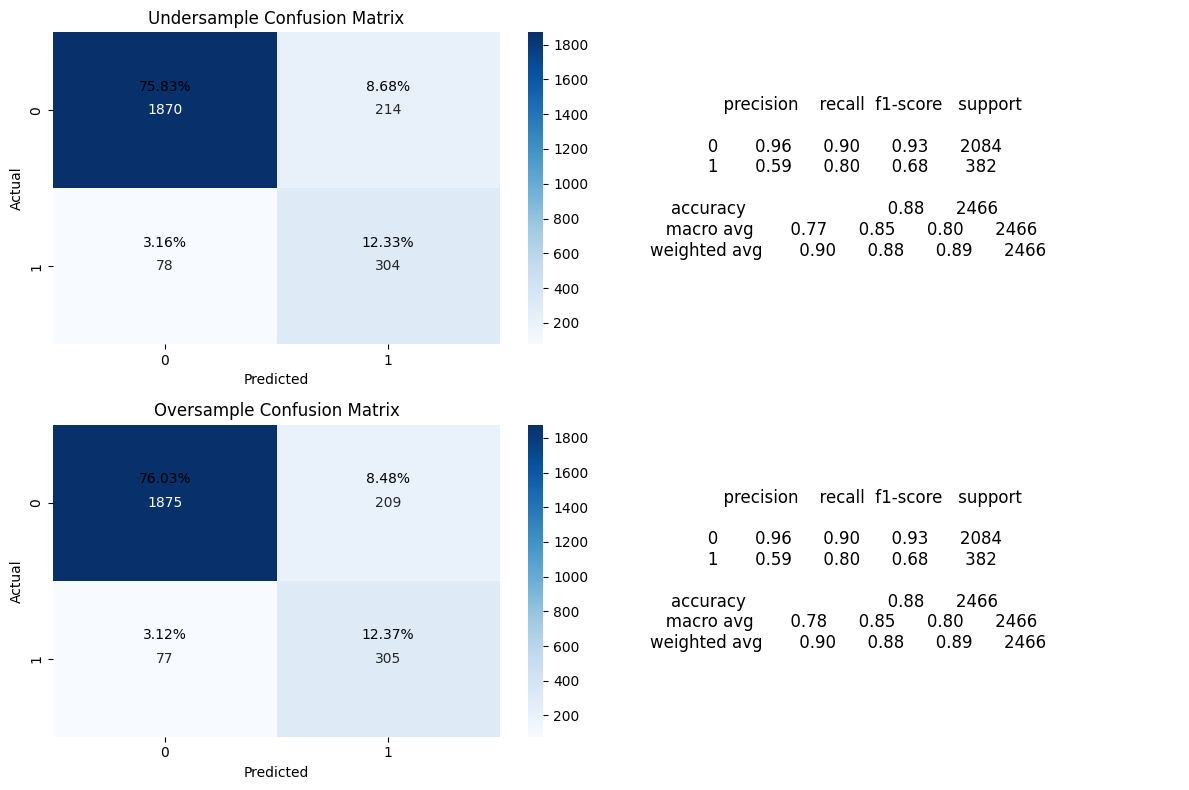

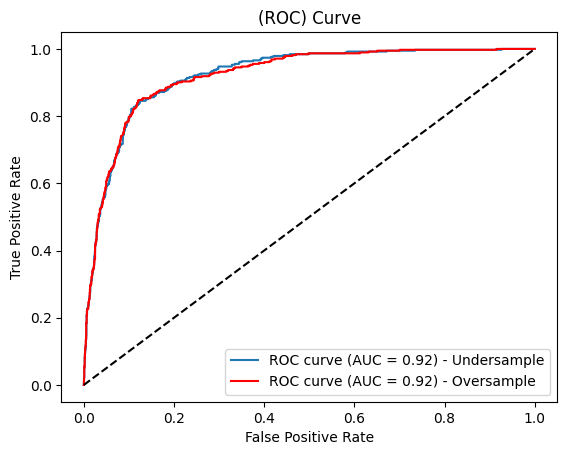

In [257]:
param_grid = {
    'C': [0.1, 1.0],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel function
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf' and 'poly'
    'probability': [True], # Whether to enable probability estimates
    'class_weight': ['balanced', {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 2, 1: 3}, {0: 3, 1: 4}, {0: 4, 1: 5}] # Different Weights
}

svm = SVC()

# Undersampling dataset - Best Params = {'C': 1.0, 'class_weight': {0: 3, 1: 4}, 'gamma': 'scale', 'kernel': 'linear', 'probability': True}
svm_under_params = grid_search_eval(x_train_undersampled,y_train_undersampled,x_test,y_test,svm,param_grid)
print("Best Params:", svm_under_params)

# Oversampling dataset - Best Params = {kernel='linear', C=1, gamma='auto', probability=True, class_weight={0: 3, 1: 4}}
svm_over_params = grid_search_eval(x_train_oversampled,y_train_oversampled,x_test,y_test,svm,param_grid)
print("Best Params:", svm_over_params)


# Undersampling Dataset
svm_under = SVC(kernel='linear', C=1, gamma='scale', probability=True, class_weight={0: 3, 1: 4})
svm_under.fit(x_train_undersampled, y_train_undersampled)
y_pred1 = svm_under.predict(x_test)

# Oversampling Dataset
svm_over = SVC(kernel='linear', C=1, gamma='auto', probability=True, class_weight={0: 3, 1: 4})
svm_over.fit(x_train_oversampled, y_train_oversampled)
y_pred2 = svm_over.predict(x_test)

plot_cfmatrix_report_double(y_test, y_pred1, y_pred2)
plot_auc_curves(svm_under,svm_over,x_test,y_test)


Both datasets produce a good AUC and accuracy, however the precision is stil low in both.

#### Random Forest
Random Forest combines various decision trees to produce precise predictions. Large datasets are handled, overfitting is minimized, and non-linear relationships are captured.It has some computational costs and has problems with data that isn't balanced.

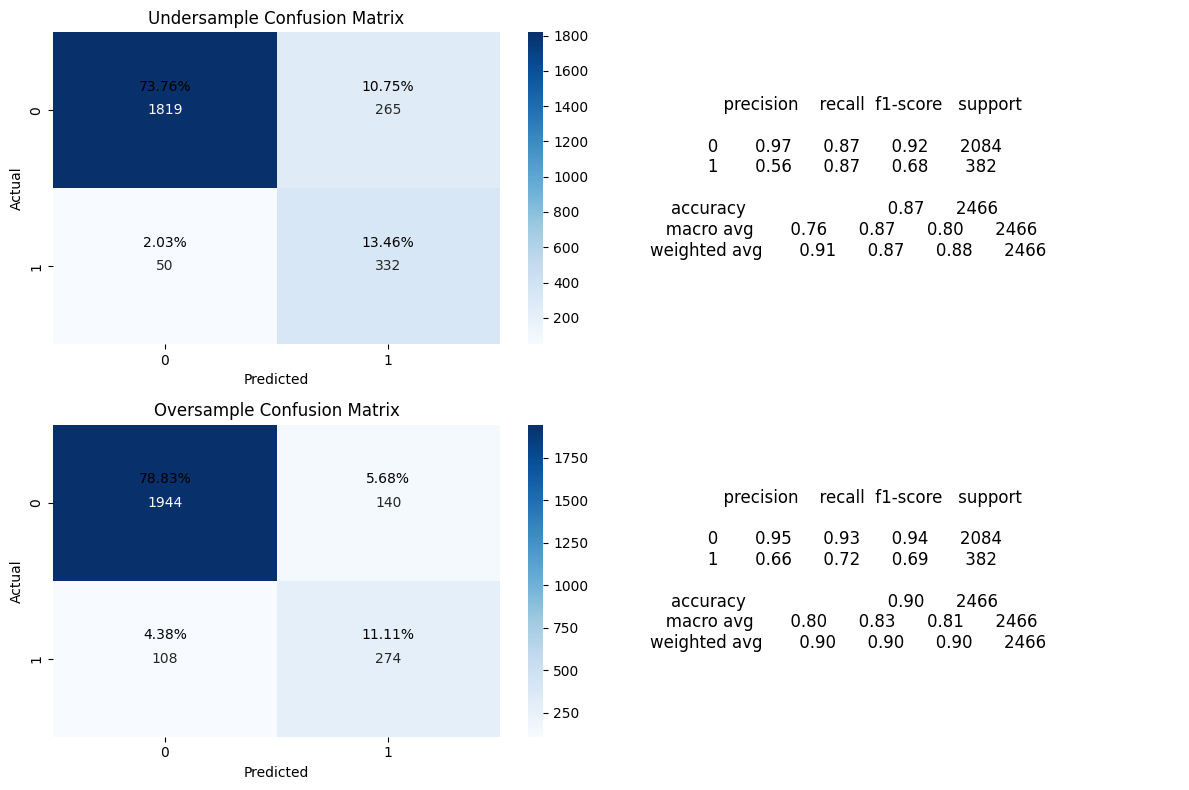

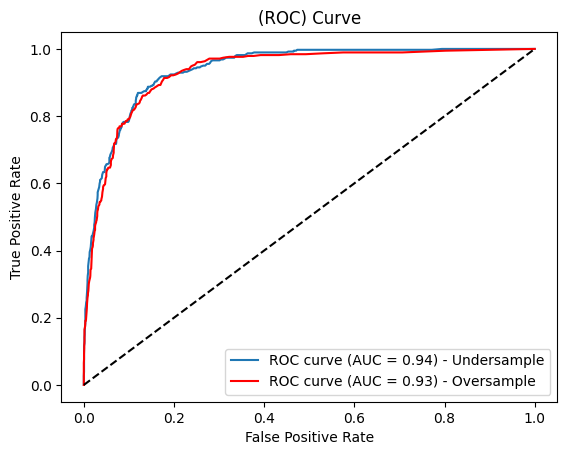

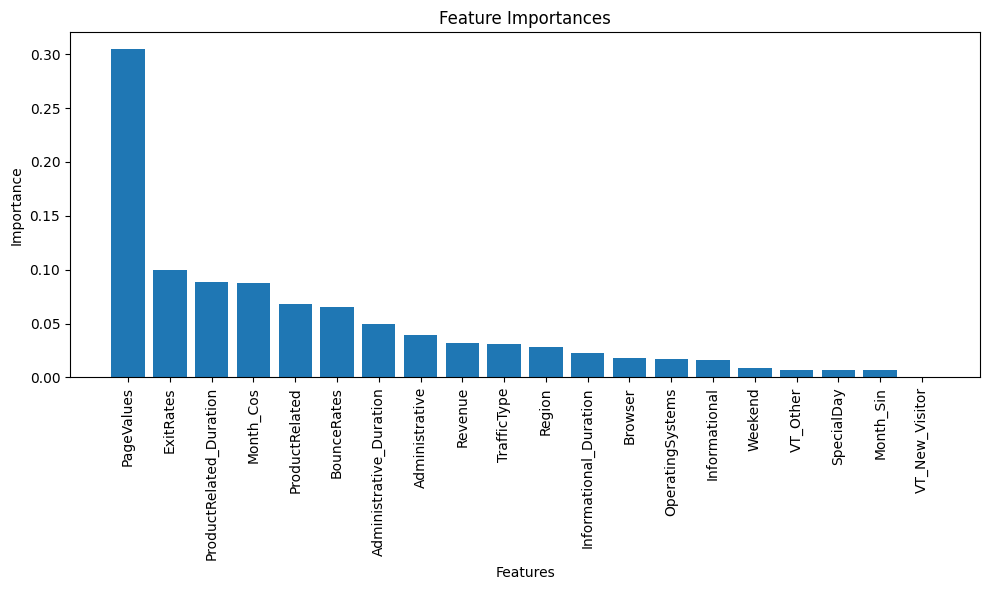

In [258]:

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 2, 1: 3}, {0: 3, 1: 4}]  # Example weight settings
}

random_forest = RandomForestClassifier()

# Undersampling dataset - Best Params = {'class_weight': {0: 1, 1: 3}, 'max_depth': None, 'n_estimators': 300}
rf_under_params = grid_search_eval(x_train_undersampled,y_train_undersampled,x_test,y_test,random_forest,param_grid)
print("Best Params:", rf_under_params)

# Oversampling dataset - Best Params = {'class_weight': {0: 2, 1: 3}, 'max_depth': None, 'n_estimators': 200}
rf_over_params = grid_search_eval(x_train_oversampled,y_train_oversampled,x_test,y_test,random_forest,param_grid)
print("Best Params:", rf_over_params)

# Undersampling Dataset
rf_under = RandomForestClassifier(class_weight = {0: 1, 1: 3}, max_depth = None, n_estimators = 300)
rf_under.fit(x_train_undersampled, y_train_undersampled)
y_pred1 = rf_under.predict(x_test)

# Oversampling Dataset
rf_over = RandomForestClassifier(class_weight = {0: 2, 1: 3}, max_depth = None, n_estimators = 200)
rf_over.fit(x_train_oversampled, y_train_oversampled)
y_pred2 = rf_over.predict(x_test)

plot_cfmatrix_report_double(y_test, y_pred1, y_pred2)
plot_auc_curves(rf_under,rf_over,x_test,y_test)

# Checking the Features Importance
importances = rf_under.feature_importances_
feature_names = df.columns[:-1]
indices = np.argsort(importances)[::-1]

"""
print("Feature ranking:")
for i, idx in enumerate(indices):
    print(f"{i+1}. {feature_names[idx]} ({importances[idx]})")
"""


# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

We can see that the oversampling dataset produces a better precision ~ 0.67, which is the highest we've reached until now. Also the random forest algorithm allows us to see the features that had more weight on the algorithm, and we observe that PageValues is the one with the biggest weight, which is what we found out when doing the Point Bisserial Test.

#### Stratified Cross-Validation - Using 10 splits
In Stratified Cross-Validation, the dataset is split into many folds while maintaining the original dataset's class distribution. This makes the evaluation more trustworthy by ensuring that each fold comprises a representative percentage of each class. This method is very helpful in dealing with unbalanced datasets, when the number of samples in each class vary dramatically, because it incorporates stratification. It aids in the prevention of skewed evaluation findings and offers a more thorough evaluation of the model's effectiveness across various classes.

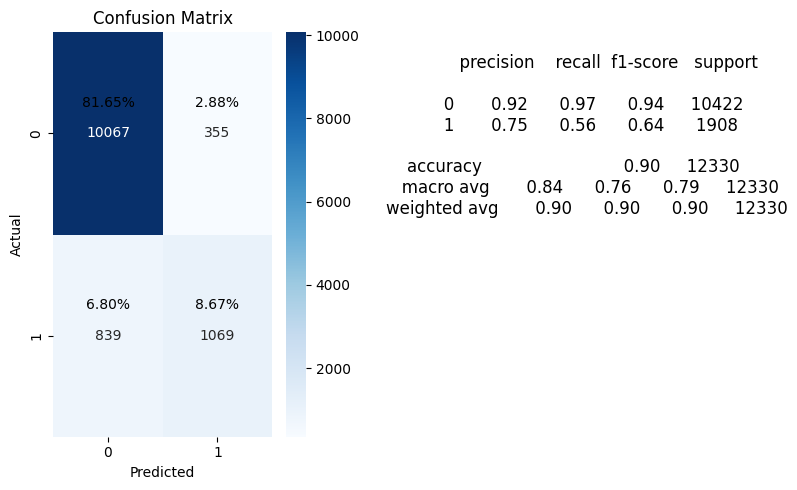

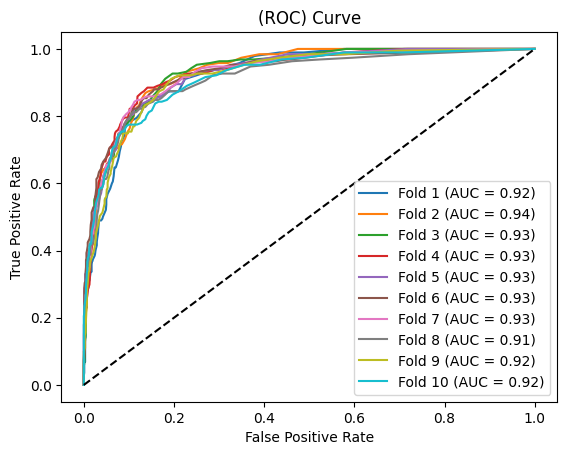

Cross-validation scores: [0.8880778588807786, 0.9059205190592052, 0.9075425790754258, 0.9083536090835361, 0.9042984590429846, 0.9148418491484185, 0.9059205190592052, 0.9010543390105434, 0.8913219789132197, 0.9042984590429846]


In [259]:
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True)
rf = RandomForestClassifier()
res = []

all_predicted_labels = []
all_true_labels = []

fprs = []
tprs = []
aucs = []

for train_index, test_index in stratified_kfold.split(x_scaled, y): 
    X_train_fold, X_test_fold = x_scaled[train_index], x_scaled[test_index] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    rf.fit(X_train_fold, y_train_fold) 
    
    predicted_labels = rf.predict(X_test_fold)
    all_predicted_labels.extend(predicted_labels)
    all_true_labels.extend(y_test_fold)
    res.append(rf.score(X_test_fold, y_test_fold))
    
    y_pred_prob = rf.predict_proba(X_test_fold)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_prob)
    auc = roc_auc_score(y_test_fold, y_pred_prob)
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(auc)

plot_cfmatrix_report(all_true_labels,all_predicted_labels)

plot_auc_folds(fprs, tprs, aucs)
print("Cross-validation scores:", res)

In this algorithm we do a stratified cross validation with 10 folds. We can see that the AUC for the folds are all around 0.92/0.93, which is pretty good. Also we reach the highest precision of all, 0.75. Which is not great, but is way better when compared to the other algorithms.

#### Algorithm Comparison
Some common code to plot the comparisons between the algorithms.

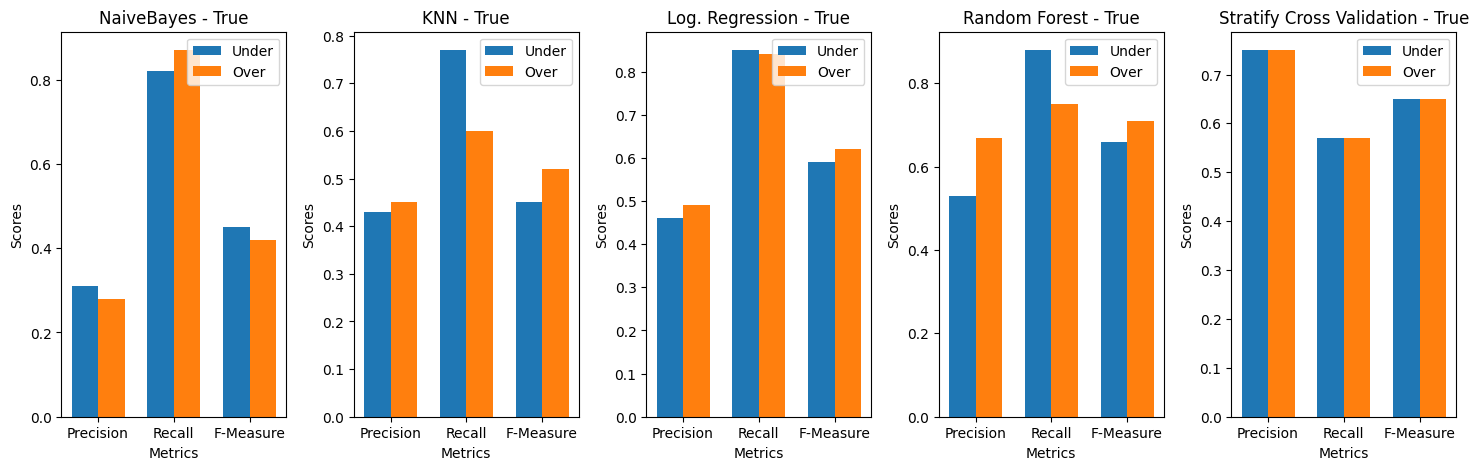

In [262]:
undersample_data_true = {
    'NaiveBayes': [0.31, 0.82, 0.45],
    'KNN': [0.43, 0.77, 0.45],
    'Log. Regression': [0.46, 0.85, 0.59],
    'SVM': [0.52, 0.82, 0.64],
    'Random Forest': [0.53, 0.88, 0.66],
    'Stratify Cross Validation': [0.75, 0.57, 0.65]
}

oversample_data_true  = {
    'NaiveBayes': [0.28, 0.87, 0.42],
    'KNN': [0.45, 0.60, 0.52],
    'Log. Regression': [0.49, 0.84, 0.62],
    'SVM': [0.57, 0.81, 0.67],
    'Random Forest': [0.67, 0.75, 0.71],
    'Stratify Cross Validation': [0.75, 0.57, 0.65]
}

alg_data_under = {
    'NaiveBayes': [0.69, 0.82],
    'KNN': [0.81, 0.87],
    'Log. Regression': [0.82, 0.91],
    'SVM': [0.85, 0.91],
    'Random Forest': [0.86, 0.93],
    'Stratify Cross Validation': [0.90, 0.93]   
}

alg_data_over = {
    'NaiveBayes': [0.63, 0.82],
    'KNN': [0.83, 0.78],
    'Log. Regression': [0.84, 0.91],
    'SVM': [0.88, 0.91],
    'Random Forest': [0.90, 0.93],
    'Stratify Cross Validation': [0.90, 0.93]   
}



algs = ['NaiveBayes','KNN','Log. Regression','Random Forest','Stratify Cross Validation']

metrics = ['Precision', 'Recall', 'F-Measure']

def compare_metric(algorithms, type, undersample_data, oversample_data):
    num_algorithms = len(algorithms)
    x = np.arange(len(metrics))
    width = 0.35

    # Create a figure with five subplots, arranged side by side
    fig, axes = plt.subplots(1, num_algorithms, figsize=(18, 5))

    for i, algorithm in enumerate(algorithms):
        undersample_values = undersample_data[algorithm]
        oversample_values = oversample_data[algorithm]

        # Plot for each algorithm
        rects1 = axes[i].bar(x, undersample_values, width, label='Under')
        rects2 = axes[i].bar(x + width, oversample_values, width, label='Over')
        axes[i].set_xlabel('Metrics')
        axes[i].set_ylabel('Scores')
        axes[i].set_title(algorithm + ' - ' + str(type))
        axes[i].set_xticks(x + width / 2)
        axes[i].set_xticklabels(metrics)
        axes[i].legend()

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.3)

    # Show the figure with all plots
    plt.show()

compare_metric(algs, True, undersample_data_true, oversample_data_true)

When comparing the different algorithms by this 3 different metrics (Precision,Recall & F-Measure), we think that **precision** should have more weight on whether an algorithm is better than the other. From the business point of view, we value more having less FP and a bit more FN than the opposite.
For instance, if false positives result in wasted marketing resources or expenses, and false negatives lead to missed revenue opportunities, we may want to prioritize minimizing false negatives.


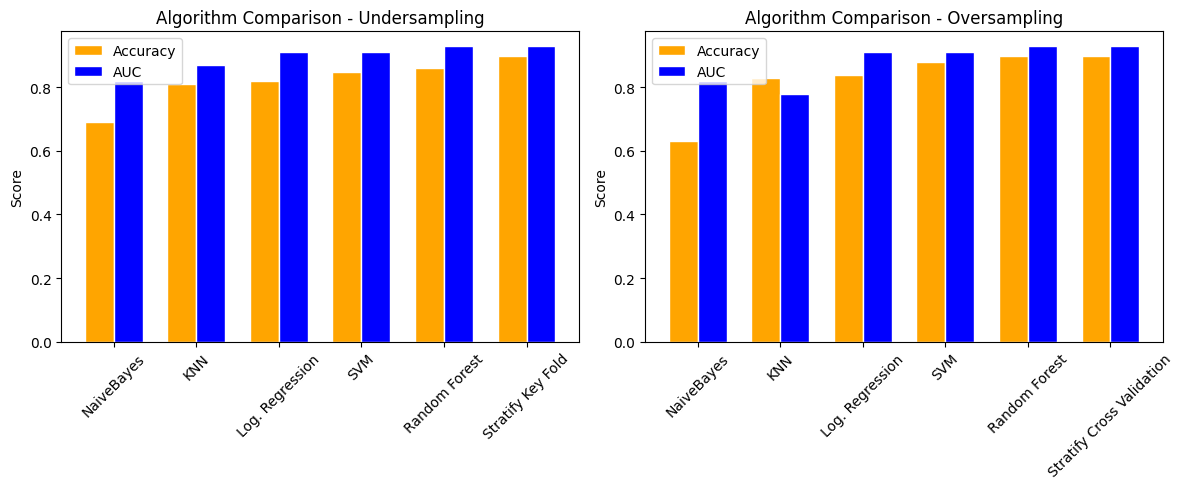

In [263]:
def plot_algorithm_comparison(data_dict, type, metrics=["Accuracy","AUC"]):
    algorithms = list(data_dict.keys())
    values = np.array(list(data_dict.values()))

    bar_width = 0.35

    r = np.arange(len(algorithms))

    colors = ['orange', 'blue']
    for i in range(len(metrics)):
        plt.bar(r + i * bar_width, values[:, i], color=colors[i], width=bar_width, edgecolor='white', label=metrics[i])

    plt.ylabel('Score')
    plt.title('Algorithm Comparison - ' + type)
    plt.xticks(r + bar_width / 2, algorithms, rotation=45)

    plt.legend()

    plt.tight_layout()


alg_data_under = {
    'NaiveBayes': [0.69, 0.82],
    'KNN': [0.81, 0.87],
    'Log. Regression': [0.82, 0.91],
    'SVM': [0.85, 0.91],
    'Random Forest': [0.86, 0.93],
    'Stratify Key Fold': [0.90, 0.93]
}

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))


plot_algorithm_comparison(alg_data_over, type="Oversampling", metrics=["Accuracy", "AUC"])
plt.sca(axs[0])

# Plot the first subplot
plot_algorithm_comparison(alg_data_under, type="Undersampling", metrics=["Accuracy", "AUC"])
plt.sca(axs[0])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.tight_layout()
plt.show()


By analyzing all the different algorithms, we can conclude that the ones that gave us the best results are **Random Forest & Stratify Cross Validation**. Not only because they have a good accuracy and AUC, but also because relatively high precision & recall when compared to others.